# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [37]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [63]:
def slope(x,y):
    num = np.mean(x) * np.mean(y) - np.mean(x*y)
    den = np.mean(x)**2 - np.mean(x**2)
    return num/den
def intercept(x,y,m):
    return np.mean(y) - m * np.mean(x)
def y_predict(x,m,c):
    return m * x + c
def r_squared(y,y_hat):
    num = np.sum([(y[i] - y_hat[i])**2 for i in range(len(y))])
    den = np.sum([(y[i] - np.mean(y))**2 for i in range(len(y))])
    return 1 - num/den
def regression(x,y):
    m = slope(x,y)
    c = intercept(x,y,m)
    y_hat = y_predict(x,m,c)
    r2 = r_squared(y,y_hat)
    print('Basic Regression Diagnostics')
    print('----------------------------')
    print(f'Slope: {np.round(m,2)}')
    print(f'Y-Intercept: {np.round(c,2)}')
    print(f'R-Squared: {np.round(r2,2)}')
    print('----------------------------')
    print(f'Model: Y = {np.round(m,2)}X + {np.round(c,2)}')
    plt.figure(figsize=(8,5))
    plt.scatter(x,y,c='r',label='Data')
    plt.plot(x,y_hat,c='black',label='Regression')
    plt.legend()
    plt.show()
    return m,c

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56X + 6.33


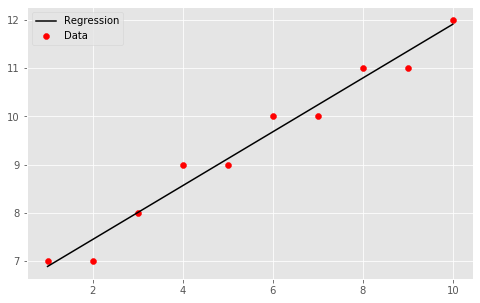

In [64]:
m, c = regression(X,Y)

In [40]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

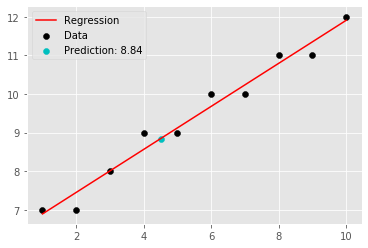

In [65]:
x = 4.5
y = m*x+c
y_hat = y_predict(X,m,c)
plt.scatter(X,Y,c='black',label='Data')
plt.scatter(x,y,c='c',label=f'Prediction: {np.round(y,2)}')
plt.plot(X,y_hat,c='r',label='Regression')
plt.legend()
plt.show()

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('heightweight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54X + -204.48


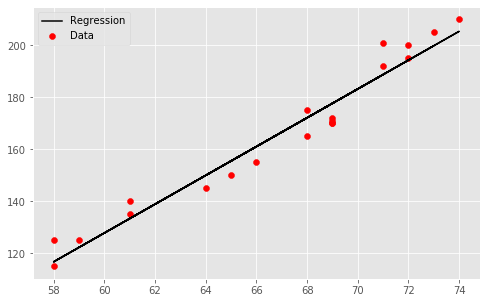

In [69]:
xs = np.array([df.height[i] for i in range(len(df))])
ys = np.array([df.weight[i] for i in range(len(df))])

m, c = regression(xs, ys)

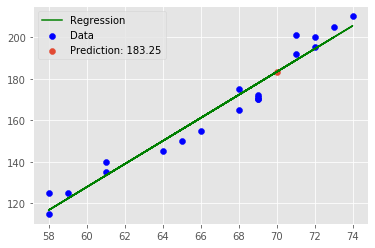

In [71]:
new_x = 70
new_y = m*new_x+c

plt.scatter(xs,ys,c='b',label='Data')
plt.scatter(new_x,new_y,label=f'Prediction: {np.round(new_y,2)}')
plt.plot(xs,y_predict(xs,m,c),c='g',label='Regression')
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 